In [1]:
!pip install torchbnn

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torchbnn as bnn

In [3]:
import os
print(os.listdir("./"))

['.config', 'hpp.pt', 'train.csv', 'sample_data']


In [4]:
raw_data = pd.read_csv('./train.csv')

In [5]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
raw_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
numeric_colmuns = []
numeric_colmuns.extend(list(raw_data.dtypes[raw_data.dtypes == np.int64].index))
numeric_colmuns.extend(list(raw_data.dtypes[raw_data.dtypes == np.float64].index))

In [8]:
numeric_colmuns

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [9]:
numeric_colmuns.remove('SalePrice')
numeric_colmuns.append('SalePrice')

In [10]:
numeric_colmuns.remove('Id')

In [11]:
numeric_data = DataFrame(raw_data, columns=numeric_colmuns)

In [12]:
numeric_data.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1452.000000,1379.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,...,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,70.049958,103.685262,1978.506164,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,24.284752,181.066207,24.689725,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,21.000000,0.000000,1900.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,59.000000,0.000000,1961.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,69.000000,0.000000,1980.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,80.000000,166.000000,2002.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,313.000000,1600.000000,2010.000000,755000.000000


In [13]:
numeric_data.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,2,2008,65.0,196.0,2003.0,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,5,2007,80.0,0.0,1976.0,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,9,2008,68.0,162.0,2001.0,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,2,2006,60.0,0.0,1998.0,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,12,2008,84.0,350.0,2000.0,250000
5,50,14115,5,5,1993,1995,732,0,64,796,...,320,0,0,700,10,2009,85.0,0.0,1993.0,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,...,0,0,0,0,8,2007,75.0,186.0,2004.0,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,...,0,0,0,350,11,2009,NaN,240.0,1973.0,200000
8,50,6120,7,5,1931,1950,0,0,952,952,...,0,0,0,0,4,2008,51.0,0.0,1931.0,129900
9,190,7420,5,6,1939,1950,851,0,140,991,...,0,0,0,0,1,2008,50.0,0.0,1939.0,118000


In [14]:
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [15]:
nan_columns

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
numeric_data['LotFrontage'] = numeric_data['LotFrontage'].fillna(0)
numeric_data['MasVnrArea'] = numeric_data['MasVnrArea'].fillna(0)
numeric_data['GarageYrBlt'] = numeric_data['GarageYrBlt'].fillna(0)

In [17]:
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [18]:
nan_columns

[]

In [19]:
numeric_x_columns = list(numeric_data.columns)
numeric_x_columns.remove('SalePrice')
numeric_y_columns = ['SalePrice']

In [20]:
numeric_x_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [21]:
numeric_x_df = DataFrame(numeric_data, columns=numeric_x_columns)
numeric_y_df = DataFrame(numeric_data, columns=numeric_y_columns)

In [22]:
numeric_x = torch.tensor(numeric_x_df.values, dtype=torch.float)
numeric_y = torch.tensor(numeric_y_df.values, dtype=torch.float)

In [23]:
# First split the data into train, test

X_train, X_test, y_train, y_test = train_test_split(numeric_x, numeric_y, test_size=0.2, random_state=41)

In [24]:
y_train.max()

tensor(755000.)

In [25]:
# Mask and remove from the training dataset

# Remove 400000 - 500000
min_price = 200e3
max_price = 300e3
mask = (y_train < min_price) | (y_train > max_price)

mask.shape

torch.Size([1168, 1])

In [26]:
# Generate the filtered X_train, y_train

X_train_filt = X_train[torch.tensor(mask.squeeze())]
y_train_filt = y_train[torch.tensor(mask)]

print(f"Final training data shape: {X_train_filt.shape}")

Final training data shape: torch.Size([911, 36])


<ipython-input-26-ba74826d87c4>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_filt = X_train[torch.tensor(mask.squeeze())]
<ipython-input-26-ba74826d87c4>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_filt = y_train[torch.tensor(mask)]


In [27]:
# Scale
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform X's
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Fit and transform y's
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


In [28]:
# Convert everything to tensor
y_train = torch.tensor(y_train, dtype=torch.float32)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

### 5 layer model

In [29]:
class Net_NN(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net_NN, self).__init__()

        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)

    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.linear4(y_pred)
        return y_pred

In [30]:
class Net_BNN(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net_BNN, self).__init__()

        self.linear1 = bnn.BayesLinear(0, 0.07, D_in, H1, bias=False)
        self.linear2 = bnn.BayesLinear(0, 0.05, H1, H2, bias=False)
        self.linear3 = bnn.BayesLinear(0, 0.04, H2, H3, bias=False)
        self.linear4 = bnn.BayesLinear(0, 0.04, H3, D_out, bias=False)

    def forward(self, x):
        y_pred = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.linear4(y_pred)
        return y_pred

In [31]:
H1, H2, H3 = 500, 1000, 200
D_in, D_out = numeric_x.shape[1], numeric_y.shape[1]

# Train the NN (if need to know weights)

In [32]:
train_NN = False

In [33]:
if train_NN:
  model_NN = Net_NN(D_in, H1, H2, H3, D_out)
  criterion_NN = nn.MSELoss(reduction='sum')
  optimizer_NN = torch.optim.Adam(model_NN.parameters(), lr=1e-4 * 2)

In [34]:
if train_NN:
  losses_NN = []

  for t in range(500):
      y_pred_NN = model_NN(X_train)

      loss_NN = criterion_NN(y_pred_NN, numeric_y)
      if t % 25 == 0:
        print(t, loss_NN.item())
      losses_NN.append(loss_NN.item())

      if torch.isnan(loss_NN):
          break

      optimizer_NN.zero_grad()
      loss_NN.backward()
      optimizer_NN.step()

In [35]:
if train_NN:
  print(torch.abs(model_NN.state_dict()['linear3.weight']).max())

# Train the Bayesian Neural Network (BNN)

In [36]:
model_BNN = Net_BNN(D_in, H1, H2, H3, D_out)
criterion_BNN = nn.MSELoss(reduction='sum')
optimizer_BNN = torch.optim.Adam(model_BNN.parameters(), lr=1e-4)

In [37]:
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.1

In [38]:
# Send everything to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train = X_train.to(device)
y_train = y_train.to(device)
model_BNN = model_BNN.to(device)

In [39]:
load_model = True
epochs = 20000

if load_model:
  model_BNN.load_state_dict(torch.load('hpp.pt'))
else:
  losses_BNN = []

  for t in range(epochs):
      y_pred_BNN = model_BNN(X_train)

      loss_BNN = criterion_BNN(y_pred_BNN, y_train)
      loss_kl = kl_loss(model_BNN)
      # print(loss_BNN.shape, loss_kl.shape)
      cost_BNN = loss_BNN + kl_weight * loss_kl

      if t % 500 == 0:
        print(t, loss_BNN.item(), loss_kl.item(), cost_BNN.item())
      losses_BNN.append(cost_BNN.item())

      if torch.isnan(cost_BNN):
          break

      optimizer_BNN.zero_grad()
      cost_BNN.backward()
      optimizer_BNN.step()

<ipython-input-39-74b790a11e5b>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_BNN.load_state_dict(torch.load('hpp.pt'))


In [40]:
# Save the model
torch.save(model_BNN.state_dict(), 'hpp.pt')

In [41]:
from sklearn.metrics import r2_score

with torch.no_grad():
  y_pred = model_BNN(X_train).squeeze()

y_pred_cpu = y_pred.cpu().numpy()
y_train_cpu = y_train.cpu().numpy()

r2 = r2_score(y_train_cpu, y_pred_cpu)
print(f"Training R2 score = {r2:.4f}")

Training R2 score = 0.9737


In [43]:
# Evaluate 1000 models on the test data
n_models = 100
model_BNN = model_BNN.to("cpu")
results = torch.zeros((n_models, X_test.shape[0]))
X_test = X_test.to("cpu")

for i in range(n_models):
  results[i, :] = model_BNN(X_test).cpu().squeeze()

In [77]:
results_std_dev = torch.std(torch.tensor(scaler_y.inverse_transform(results.detach().numpy())), axis=0)

results_std_dev.shape

torch.Size([292])

In [78]:
results_with_prices = torch.stack((results_std_dev, y_test.squeeze()))

results_with_prices.shape

torch.Size([2, 292])

In [79]:
sorted_indices = torch.argsort(results_with_prices[1])
results_with_prices = results_with_prices[:, sorted_indices]

results_with_prices[1]

tensor([-1.5906e+00, -1.5413e+00, -1.4361e+00, -1.4053e+00, -1.3880e+00,
        -1.3002e+00, -1.2570e+00, -1.2137e+00, -1.1705e+00, -1.1705e+00,
        -1.1581e+00, -1.1458e+00, -1.1458e+00, -1.1276e+00, -1.0963e+00,
        -1.0840e+00, -1.0407e+00, -1.0346e+00, -9.9750e-01, -9.9750e-01,
        -9.8514e-01, -9.7279e-01, -9.3696e-01, -9.1719e-01, -9.0483e-01,
        -9.0483e-01, -8.9989e-01, -8.9865e-01, -8.9865e-01, -8.8680e-01,
        -8.8620e-01, -8.7518e-01, -8.7394e-01, -8.4923e-01, -8.4923e-01,
        -8.4923e-01, -8.3687e-01, -8.1216e-01, -8.1216e-01, -8.1216e-01,
        -7.9980e-01, -7.9919e-01, -7.8868e-01, -7.7509e-01, -7.6891e-01,
        -7.6891e-01, -7.6274e-01, -7.5656e-01, -7.5656e-01, -7.5038e-01,
        -7.4420e-01, -7.1949e-01, -7.0713e-01, -7.0095e-01, -6.9478e-01,
        -6.8983e-01, -6.8860e-01, -6.8860e-01, -6.6389e-01, -6.5771e-01,
        -6.4535e-01, -6.3979e-01, -6.3917e-01, -6.3917e-01, -6.3300e-01,
        -6.2805e-01, -6.2682e-01, -6.2682e-01, -6.1

In [80]:
sorted_prices = scaler_y.inverse_transform(results_with_prices[1].detach().numpy().reshape(1,-1))

In [81]:
sorted_prices.squeeze().shape

(292,)

In [82]:
sorted_prices.max()

485000.0

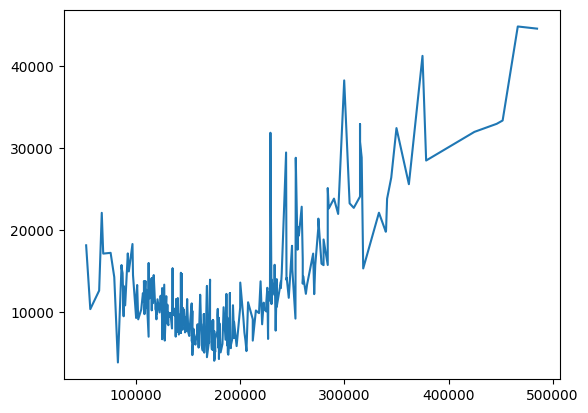

In [83]:
plt.plot(sorted_prices.squeeze(), results_with_prices[0].detach().numpy())

In [84]:
scaler_y.inverse_transform(y_train.max().cpu().detach().numpy().reshape(1,1))

array([[755000.]], dtype=float32)

In [85]:
scaler_y.inverse_transform(y_test.max().cpu().detach().numpy().reshape(1,1))

array([[485000.]], dtype=float32)

In [86]:
mean_pred = torch.mean(results, axis=0)
mean_with_price = torch.stack((mean_pred, y_test.squeeze()))

s_indices = torch.argsort(mean_with_price[1])
mean_with_price = mean_with_price[:, s_indices]

mean_with_price[0]

tensor([-1.4298, -0.9315, -1.0395, -1.6983, -1.4745, -1.1975, -1.1445, -0.1151,
        -1.1226, -0.9995, -1.1076, -0.7220, -1.0617, -0.6731, -1.0542, -1.0824,
        -1.2003, -0.8896, -0.7952, -0.8101, -0.9816, -0.6762, -0.6594, -0.9264,
        -0.6950, -1.0694, -0.9220, -0.8578, -0.7223, -0.4064, -0.8612, -1.0397,
        -1.0007, -0.2488, -1.1700, -1.0292, -0.7541, -1.0229, -0.6717, -0.9795,
        -0.6882, -1.0739, -0.7757, -0.5784, -0.7253, -0.7327, -0.5537, -0.6490,
        -0.5740, -0.5382, -0.7385, -0.6734, -0.6841, -0.5651, -0.6414, -0.5081,
        -0.7640, -0.4619, -0.6279, -0.4250, -0.7446, -0.8048, -0.5848, -0.6012,
        -0.6698, -0.3729, -0.7254, -0.5186, -0.5773, -0.6678, -0.6174, -0.6278,
        -0.0800, -0.3955, -0.6882, -0.5752, -0.6476, -0.6437, -0.3331, -0.4913,
        -1.1829, -0.5935,  0.0557, -0.5554, -0.6053, -0.6111, -0.4271, -0.4112,
        -0.5793, -0.4519, -0.6615, -0.7240, -0.6256, -0.6029, -0.2886, -0.3904,
        -0.3999, -0.6392, -0.3973, -0.42

In [87]:
mean_values = mean_with_price[0].detach().numpy()
std_values = results_with_prices[0].detach().numpy()

In [88]:
mean_values = scaler_y.inverse_transform(mean_values.reshape(1,-1)).squeeze()

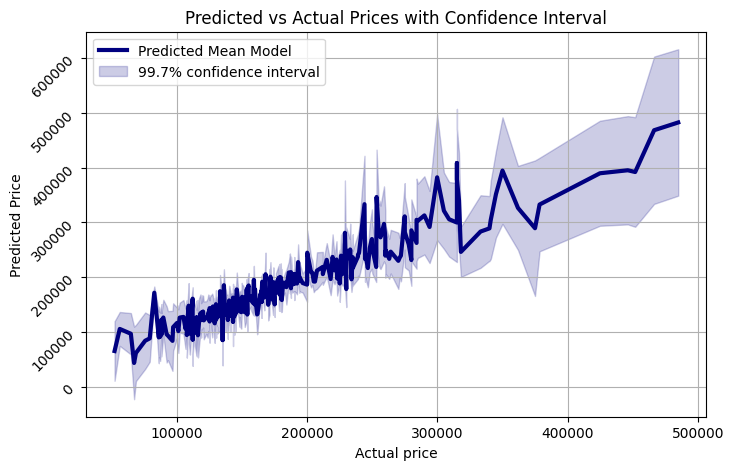

In [97]:
plt.figure(figsize=(8,5))
plt.plot(sorted_prices.squeeze(), mean_values, color='navy', lw=3, label='Predicted Mean Model')
plt.fill_between(sorted_prices.squeeze(), mean_values -3.0*std_values, mean_values+3.0*std_values, alpha=0.2, color='navy', label='99.7% confidence interval')
plt.legend(loc='upper left')
plt.xlabel('Actual price')
plt.ylabel('Predicted Price')
plt.yticks(rotation=45)
plt.title("Predicted vs Actual Prices with Confidence Interval")
# plt.ylim([0, 600000])
plt.grid()
plt.savefig("hpp.pdf", dpi=300)
